In [1]:
import pandas as pd

#### Load data and filter columns with too many empty values

In [2]:
df = pd.read_csv('Chemical_descriptors.csv', usecols=[2,5,6] + list(range(10,218)), index_col=0)

In [3]:
# remove all columns that have less than 90% of non-zero entries
df = df.loc[:,((df != 0).sum() > df.shape[0] * 0.9)]

In [4]:
df.sample(5)

,mass,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,PEOE_VSA1,SMR_VSA1,SlogP_VSA2,TPSA,HeavyAtomCount,NOCount,NumHAcceptors,NumHeteroatoms,MolLogP,MolMR
name,,,,,,,,,,,,,,,,,,,,,
(2R)-3-phospho-glyceroyl phosphate,261.93016,10.457323,-5.630473,10.457323,1.330247,0.473822,262.003,257.971,261.930164,90,...,42.857765,47.652302,23.786681,182.14,15,10,10,12,-4.43550,33.2638
NADPH,741.06200,12.498230,-5.780651,12.498230,0.024465,0.063846,741.393,715.185,741.061997,266,...,79.128885,81.050500,106.595147,376.46,48,24,23,27,-4.61313,144.6328
acetyl phosphate,137.97291,9.664931,-5.071373,9.664931,0.835764,0.405843,138.015,134.991,137.972907,48,...,18.875619,23.670156,5.969305,89.49,8,5,5,6,-1.62180,19.3725
L-glutamine,146.06914,10.034697,-1.109954,10.034697,0.021296,0.322679,146.146,136.066,146.069142,58,...,15.946722,15.007592,28.121946,107.40,10,5,3,5,-0.28623,35.2007
(R)-lactate,89.02442,9.337963,-1.435185,9.337963,1.134259,0.408586,89.070,84.030,89.024418,36,...,15.007592,15.007592,17.179799,60.36,6,3,3,3,-1.88290,16.6878


#### Analyse the distribution of values for each descriptor

In [5]:
import matplotlib.pyplot as plt

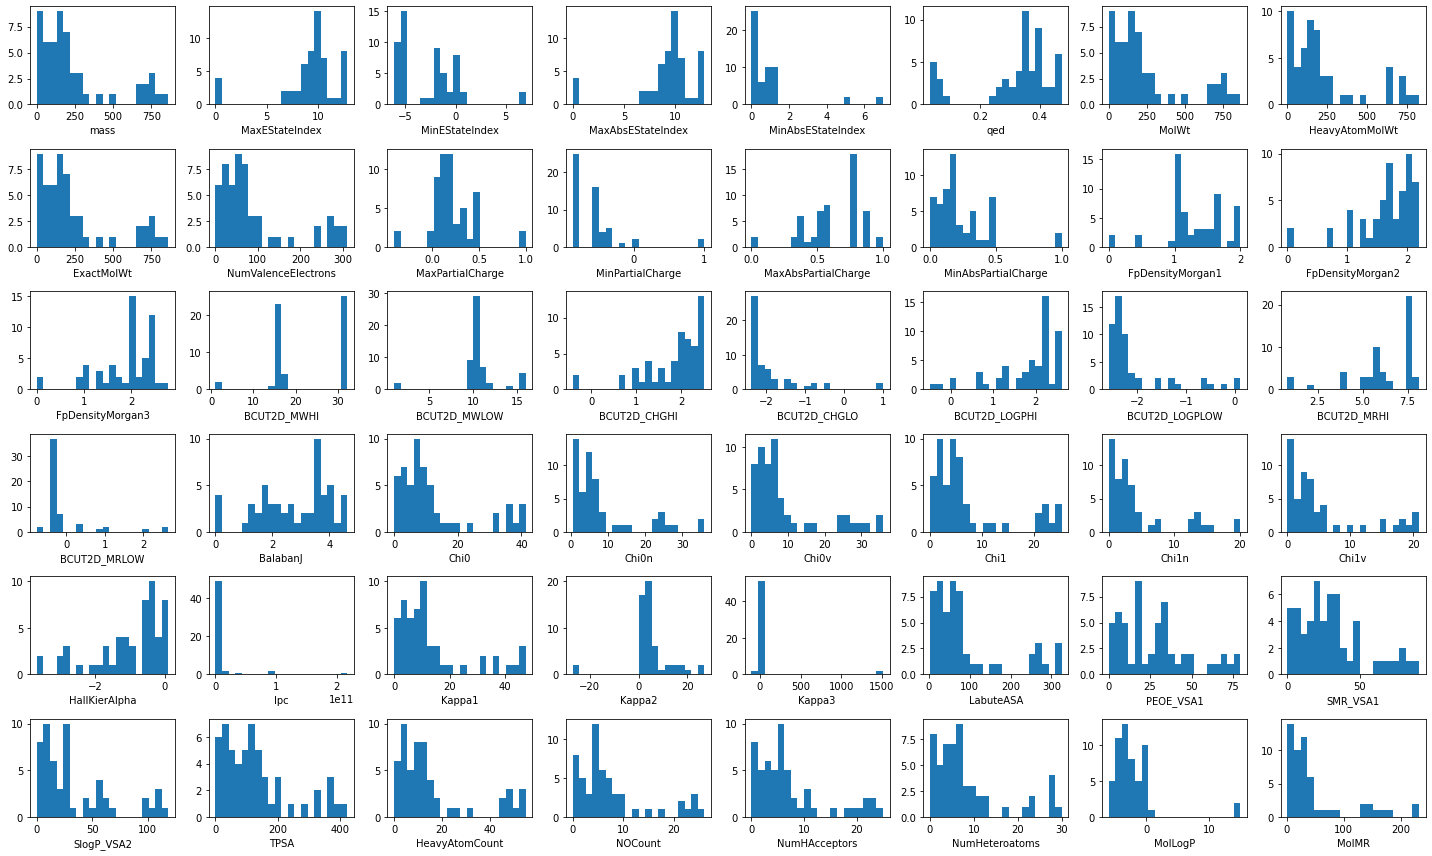

In [6]:
f, axs = plt.subplots(6, 8, figsize=(20, 12))
axs = axs.flatten()

for i in range(48):
    df.iloc[:,i].plot.hist(ax=axs[i], bins=20)
    axs[i].set_xlabel(df.columns[i])
    axs[i].set_ylabel('')
    
f.tight_layout()

#### Estimate Spearman correlation between all pairs of descriptors

In [7]:
from scipy.stats import spearmanr
correlation = [(d1, d2, spearmanr(df.loc[:,d1], df.loc[:,d2])[0]) for d1 in df.columns for d2 in df.columns]

In [8]:
df2 = pd.DataFrame(correlation, columns=['d1', 'd2', 'value'])

In [9]:
df3 = df2.pivot_table(index='d1', columns='d2', values='value')

In [10]:
import seaborn as sns

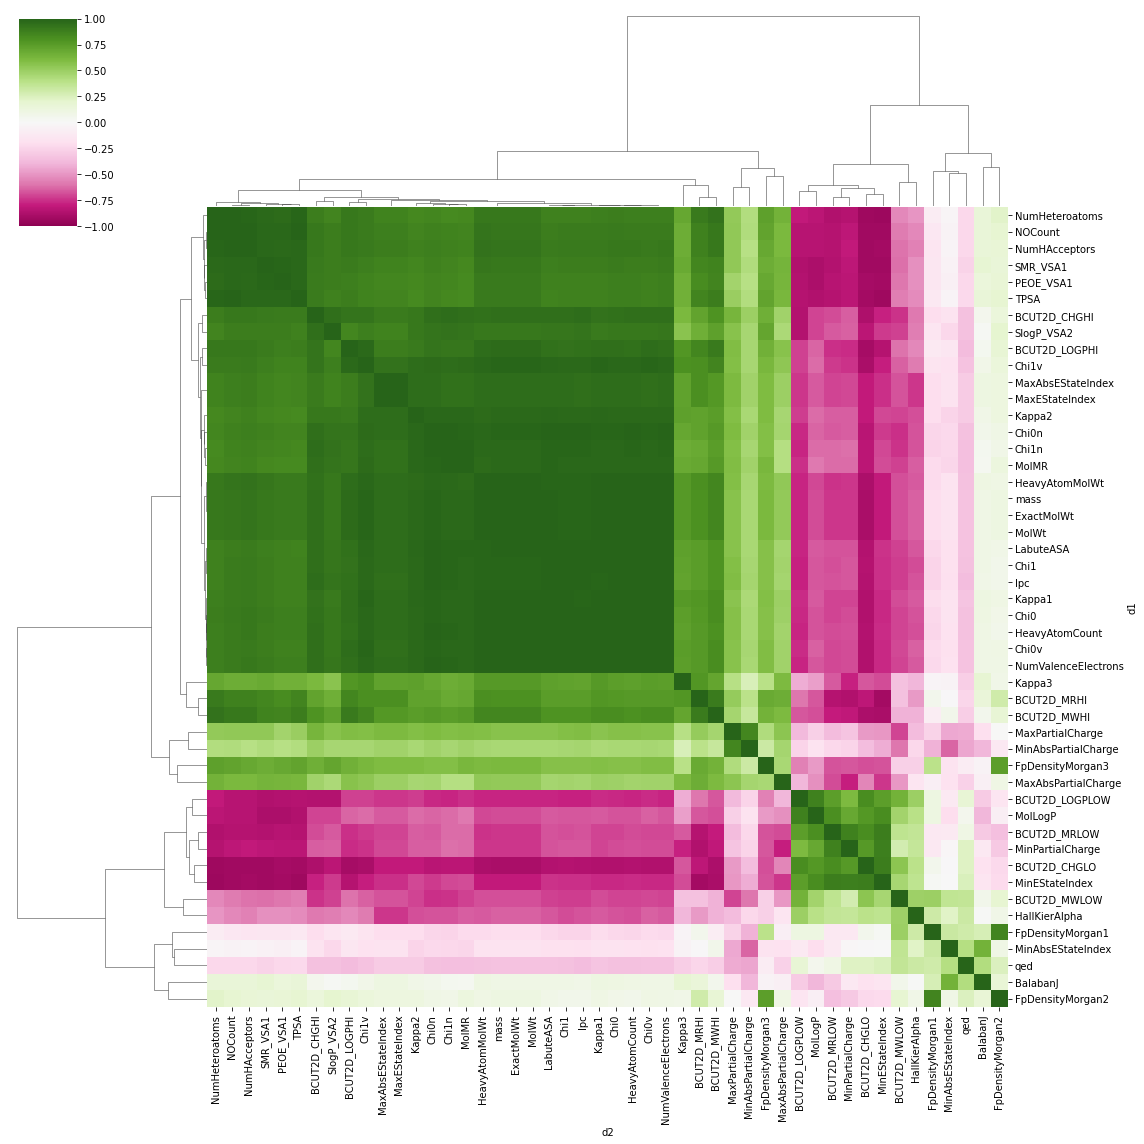

In [11]:
sns.clustermap(df3, vmin=-1, vmax=1, cmap='PiYG', figsize=(16,16))

#### Do scatter plots for pairs of features with low correlation

In [12]:
lowest = df2.query("abs(value) < 0.1 and d1 < d2")  # d1 < d2 is just to avoid plotting (a,b) and (b,a)

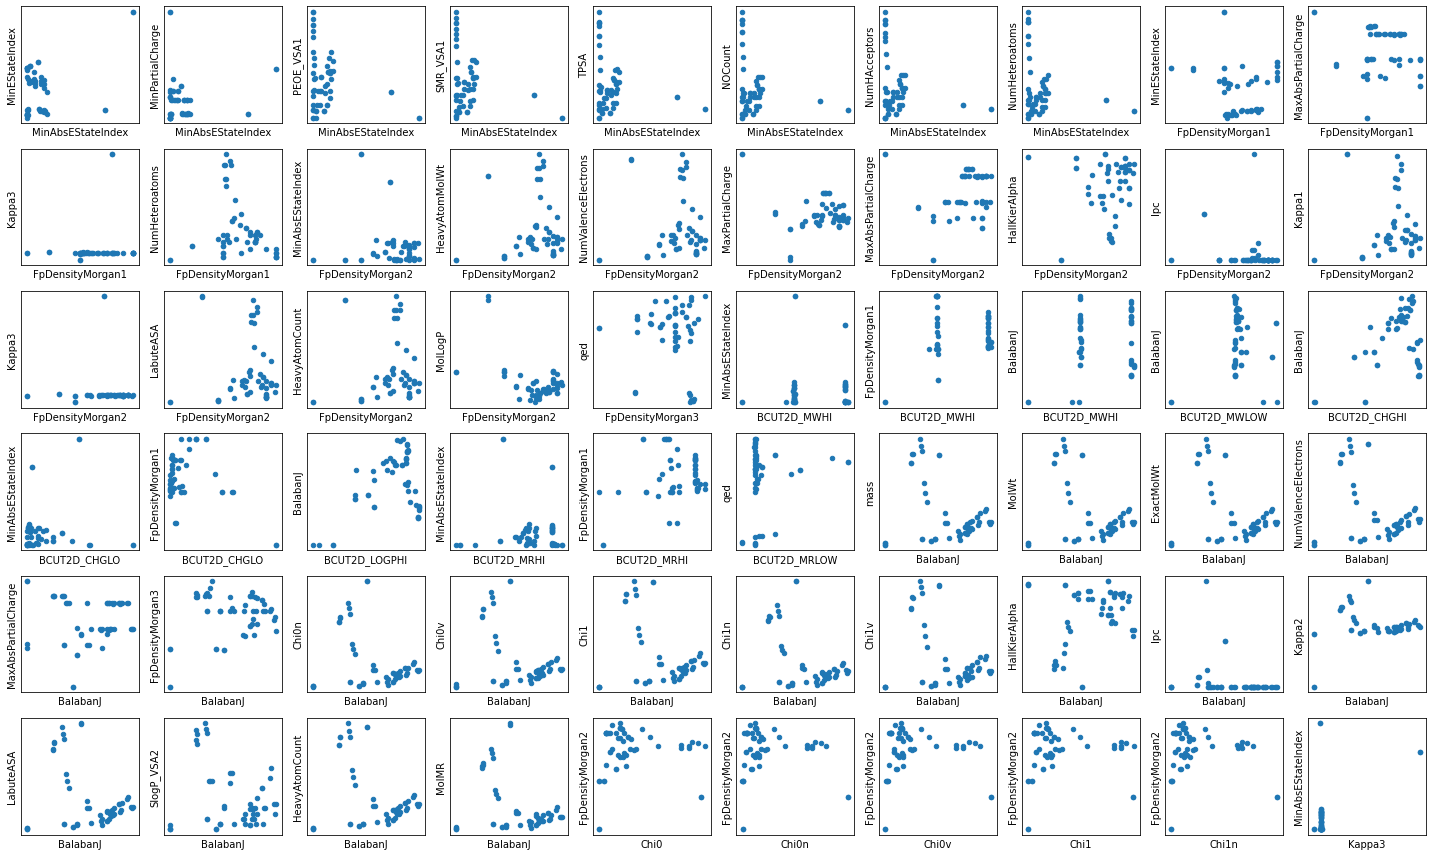

In [13]:
f, axs = plt.subplots(6, 10, figsize=(20, 12))
axs = axs.flatten()

for i in range(60):
    df.plot.scatter(lowest.iloc[i,0], lowest.iloc[i,1], ax=axs[i])
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    
f.tight_layout()